<a href="https://colab.research.google.com/github/hadiidfajri/Big-Data/blob/main/EDA_Product_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Library

In [ ]:
pip install pandas numpy scikit-learn category_encoders matplotlib seaborn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read the data (using pandas)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

100%|██████████| 147M/147M [00:05<00:00, 27.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nadyinky/sephora-products-and-skincare-reviews/versions/2


In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Assuming the CSV file has a similar name to the dataset or a common name
# You might need to adjust the filename based on the actual contents of the directory
csv_filename = None
for filename in file_list:
    if filename.endswith('.csv'):
        csv_filename = filename
        break

if csv_filename:
    csv_filepath = os.path.join(path, csv_filename)
    df = pd.read_csv(csv_filepath)
    display(df.head()) # Display the head of the dataframe to confirm it's loaded
else:
    print("No CSV file found in the downloaded directory.")
    df = None # Set df to None if no CSV is found

Files in the downloaded directory: ['reviews_1250-end.csv', 'reviews_750-1250.csv', 'reviews_500-750.csv', 'reviews_0-250.csv', 'product_info.csv', 'reviews_250-500.csv']


/tmp/ipython-input-4005352937.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filepath)


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


# Preprocessing Data


In [ ]:
df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


# Get to know the data

## All about the data (Data Type)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 42776 non-null  object 
 12  eye_color                 43717 non-null  object 
 13  skin_type                 46346 non-null  object 
 14  hair_c

Data DIstribution (Numerical and categorical)

In [ ]:
numerical_col = df.select_dtypes(exclude='object')
categorical_col = df.select_dtypes(exclude='number')

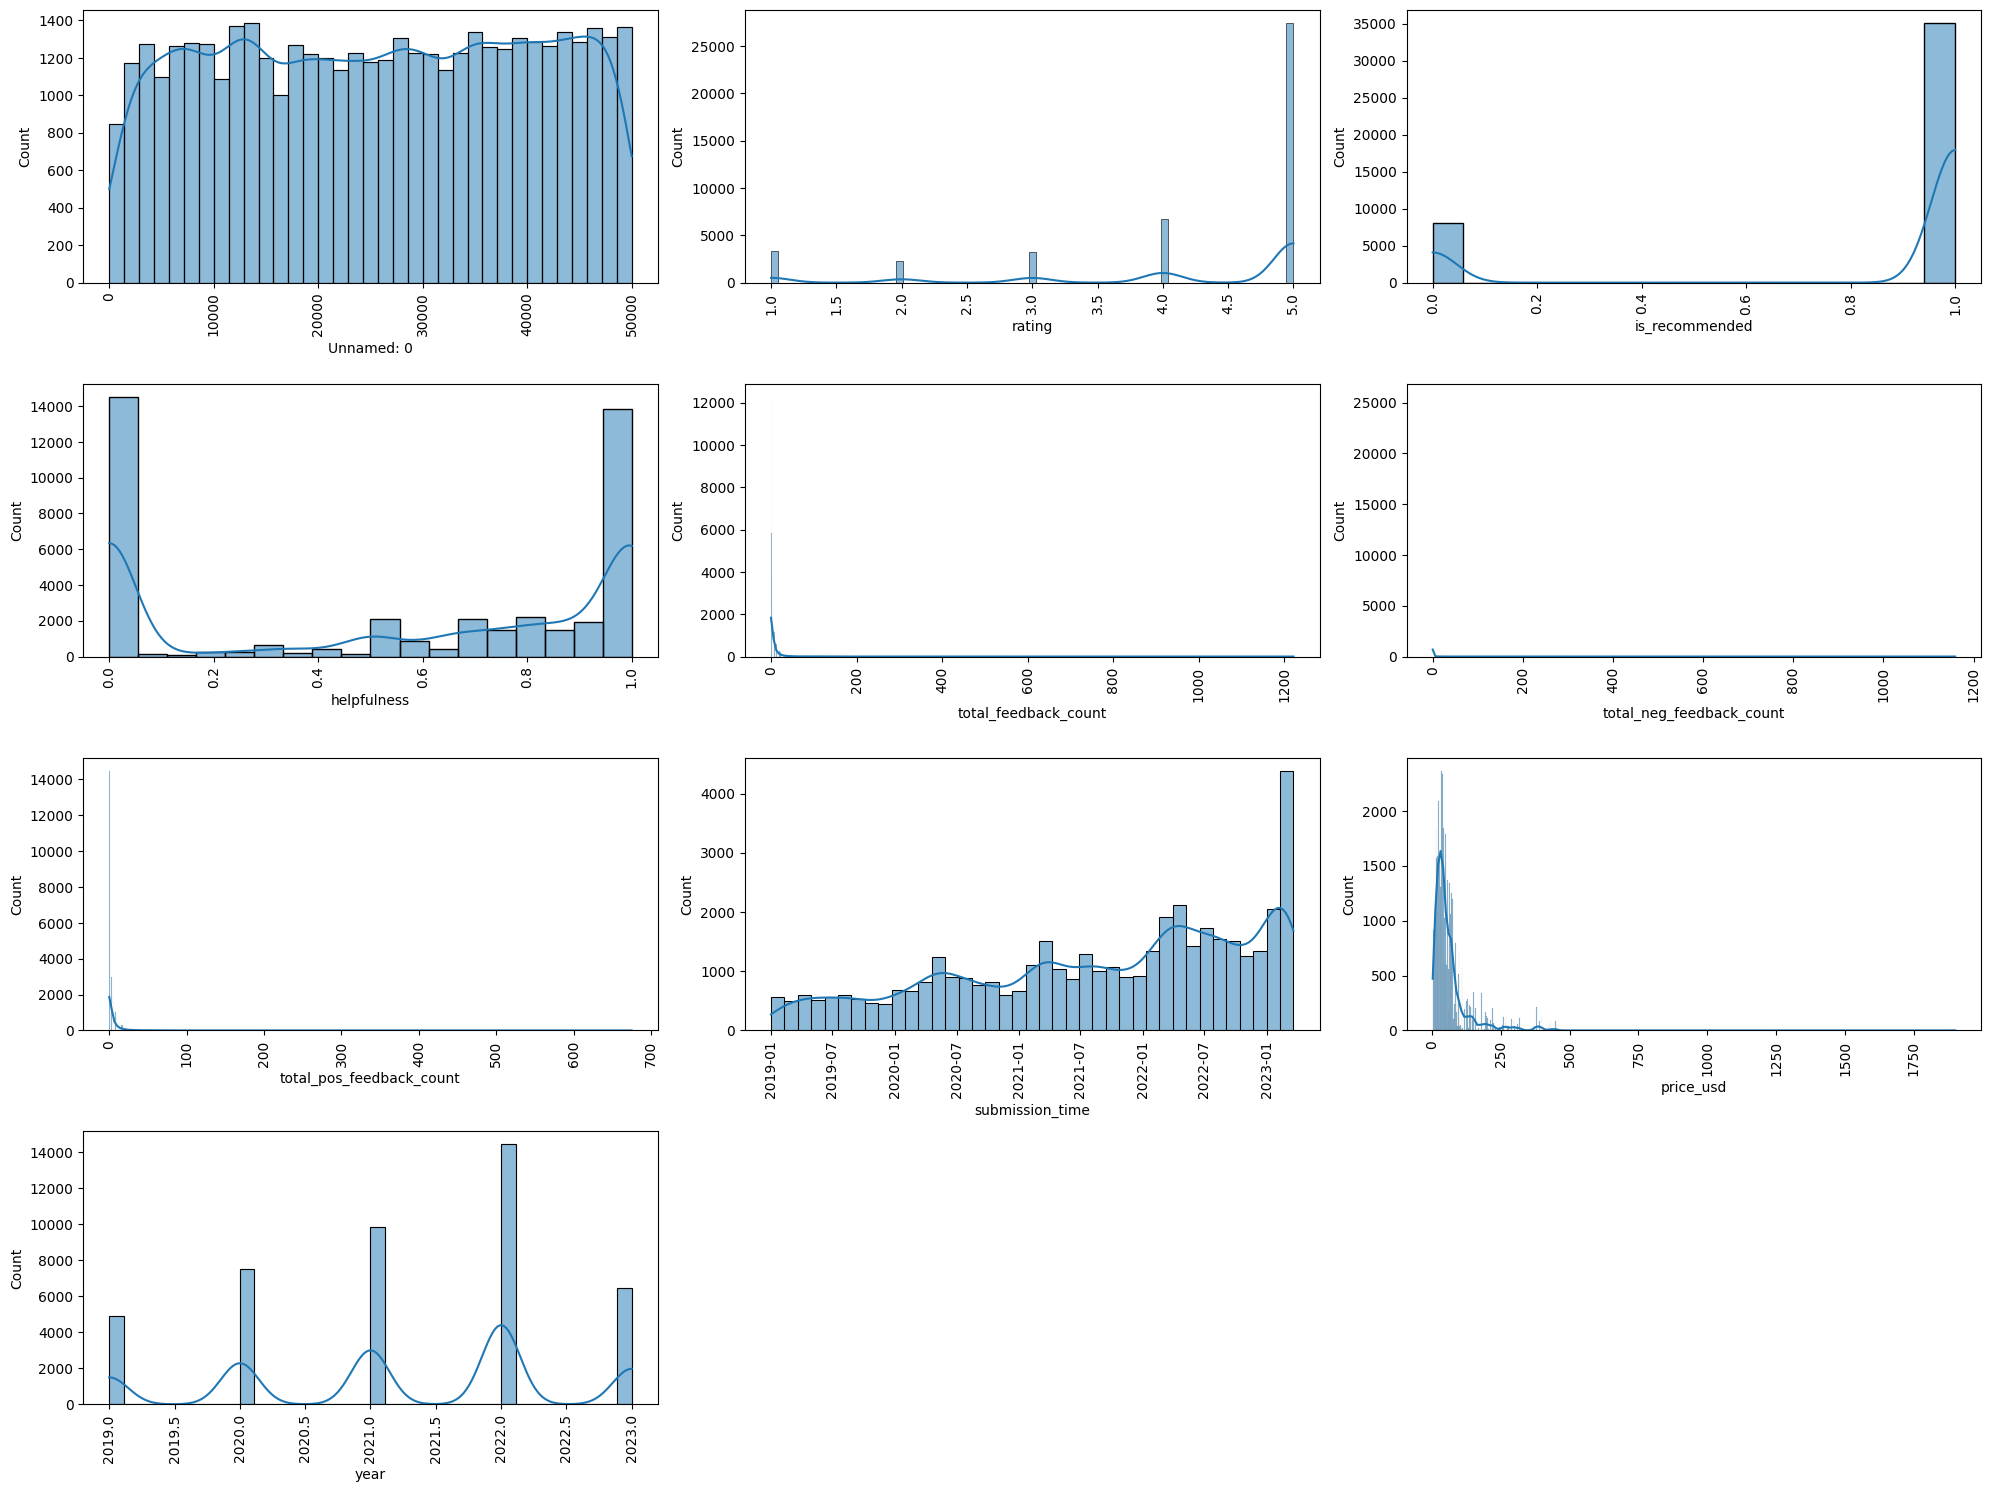

In [ ]:
plt.figure(figsize=(20, 15))
num_cols = len(numerical_col.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(numerical_col.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

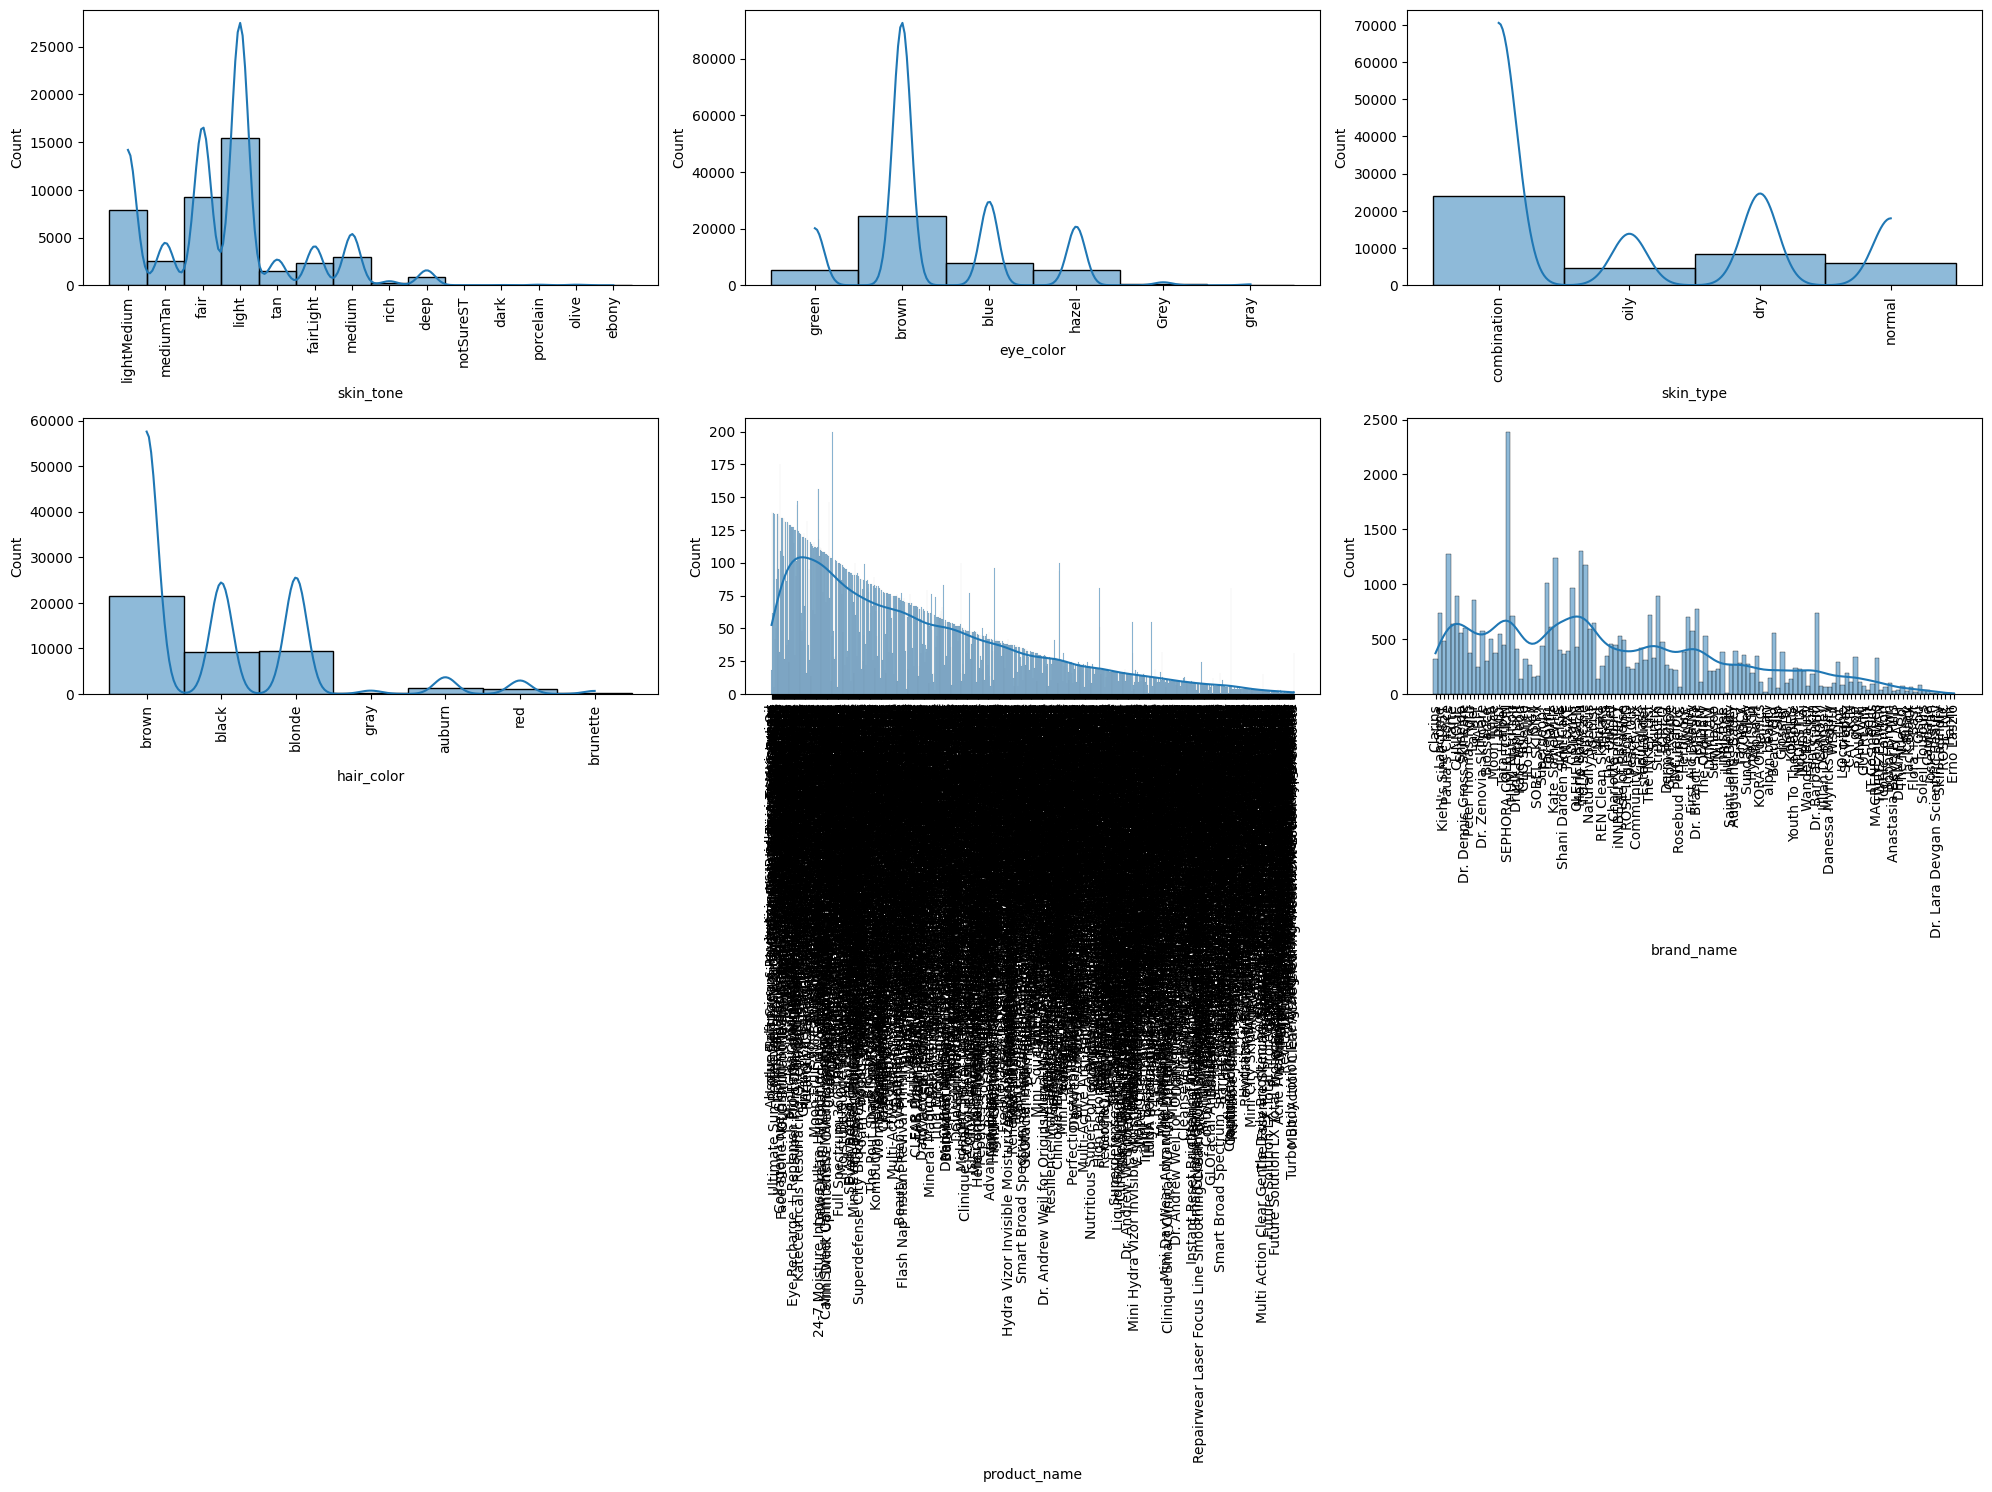

In [ ]:
plt.figure(figsize=(20, 15))
# Exclude columns that are not suitable for histogram plots
categorical_cols_to_plot = categorical_col.drop(columns=['author_id', 'submission_time', 'review_text', 'review_title','product_id'])
num_cols = len(categorical_cols_to_plot.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(categorical_cols_to_plot.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=categorical_cols_to_plot, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

## Duplicated,null,missing value,and shape

In [ ]:
print("Total of Duplicated data : ",df.duplicated().sum())
print("\n\nTotal of Null data       :\n",df.isnull().sum())
print("\n\nTotal of Missing data    :\n",df.isna().sum())
print("\n\nData Shape               : ",df .shape)

Total of Duplicated data :  0


Total of Null data       :
 Unnamed: 0                      0
author_id                       0
rating                          0
is_recommended               3817
helpfulness                 13455
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                    59
review_title                14378
skin_tone                    7201
eye_color                    6260
skin_type                    3631
hair_color                   8851
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64


Total of Missing data    :
 Unnamed: 0                      0
author_id                       0
rating                          0
is_recommended               3817
helpfulness                 13455
total_feedback_count            0
total_neg_feedback_count        0
total_pos_fee

Using imputation for missing and null data

In [ ]:
modus_isrecommended=df["is_recommended"].mode()[0]
df['is_recommended']=df['is_recommended'].fillna(modus_isrecommended)

In [ ]:
df['helpfulness']=df['helpfulness'].fillna(0)

In [ ]:
columns_to_impute_mode = ["skin_type","hair_color","eye_color","skin_tone"]

for column in columns_to_impute_mode :
  mode_value=df[column].mode()[0]
  df[column]=df[column].fillna(mode_value)
  print(f"Missing values in {column} : {df[column].isnull().sum()}")



Missing values in skin_type : 0
Missing values in hair_color : 0
Missing values in eye_color : 0
Missing values in skin_tone : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43117 entries, 0 to 49976
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                43117 non-null  int64         
 1   author_id                 43117 non-null  object        
 2   rating                    43117 non-null  int64         
 3   is_recommended            43117 non-null  float64       
 4   helpfulness               43117 non-null  float64       
 5   total_feedback_count      43117 non-null  int64         
 6   total_neg_feedback_count  43117 non-null  int64         
 7   total_pos_feedback_count  43117 non-null  int64         
 8   submission_time           43117 non-null  datetime64[ns]
 9   review_text               43058 non-null  object        
 10  review_title              29939 non-null  object        
 11  skin_tone                 43117 non-null  object        
 12  eye_color              

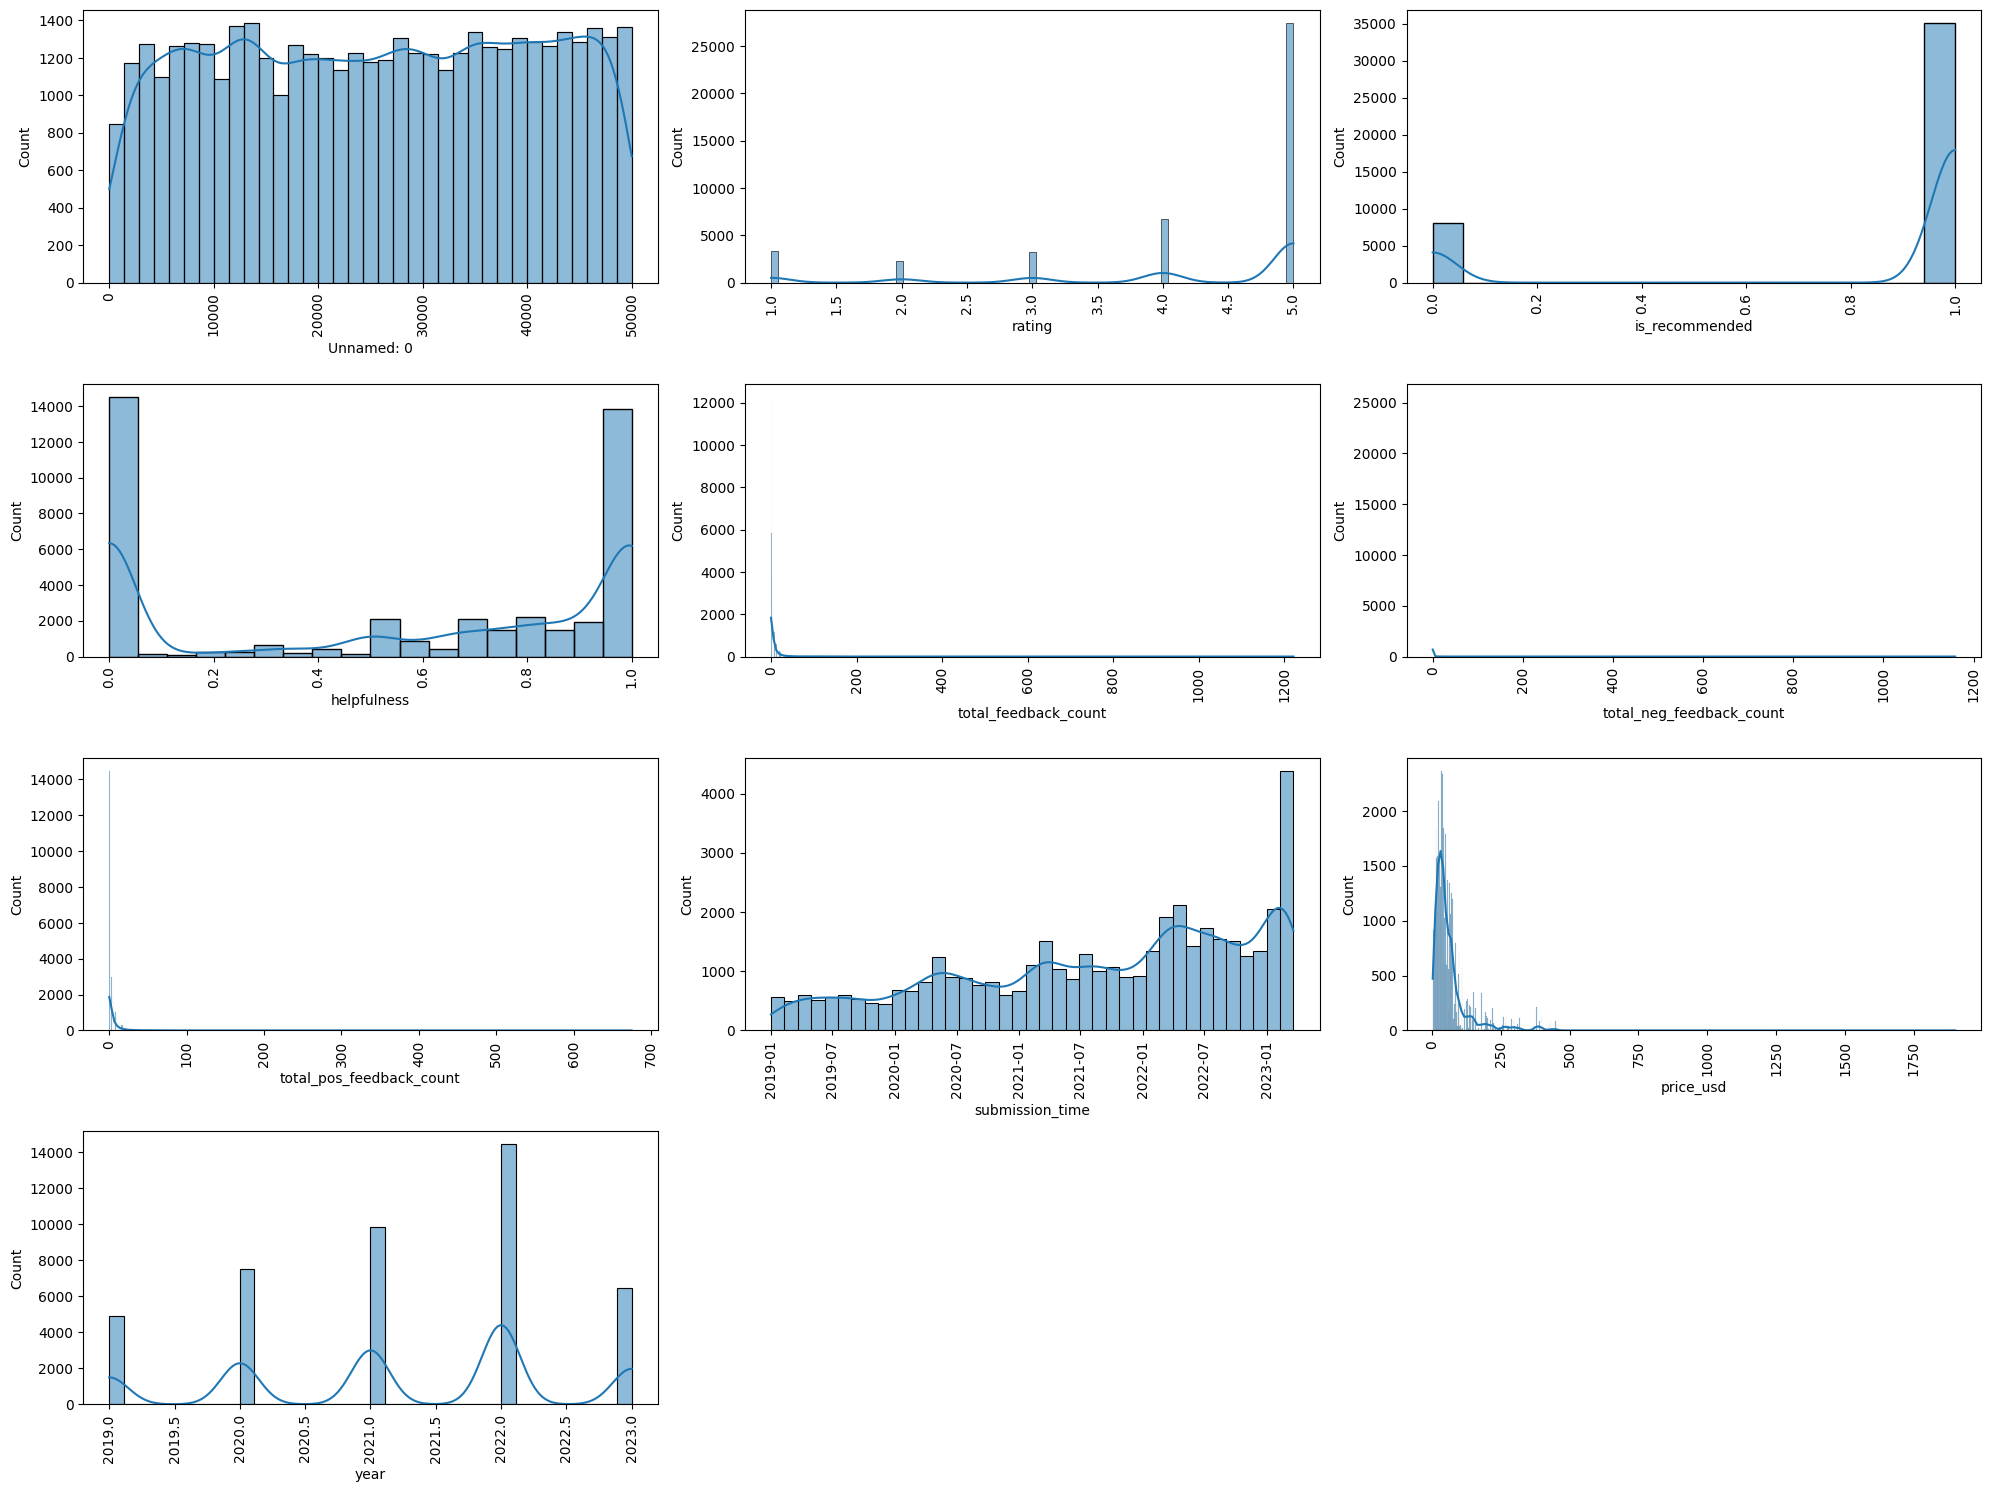

In [ ]:
plt.figure(figsize=(20, 15))
num_cols = len(numerical_col.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(numerical_col.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

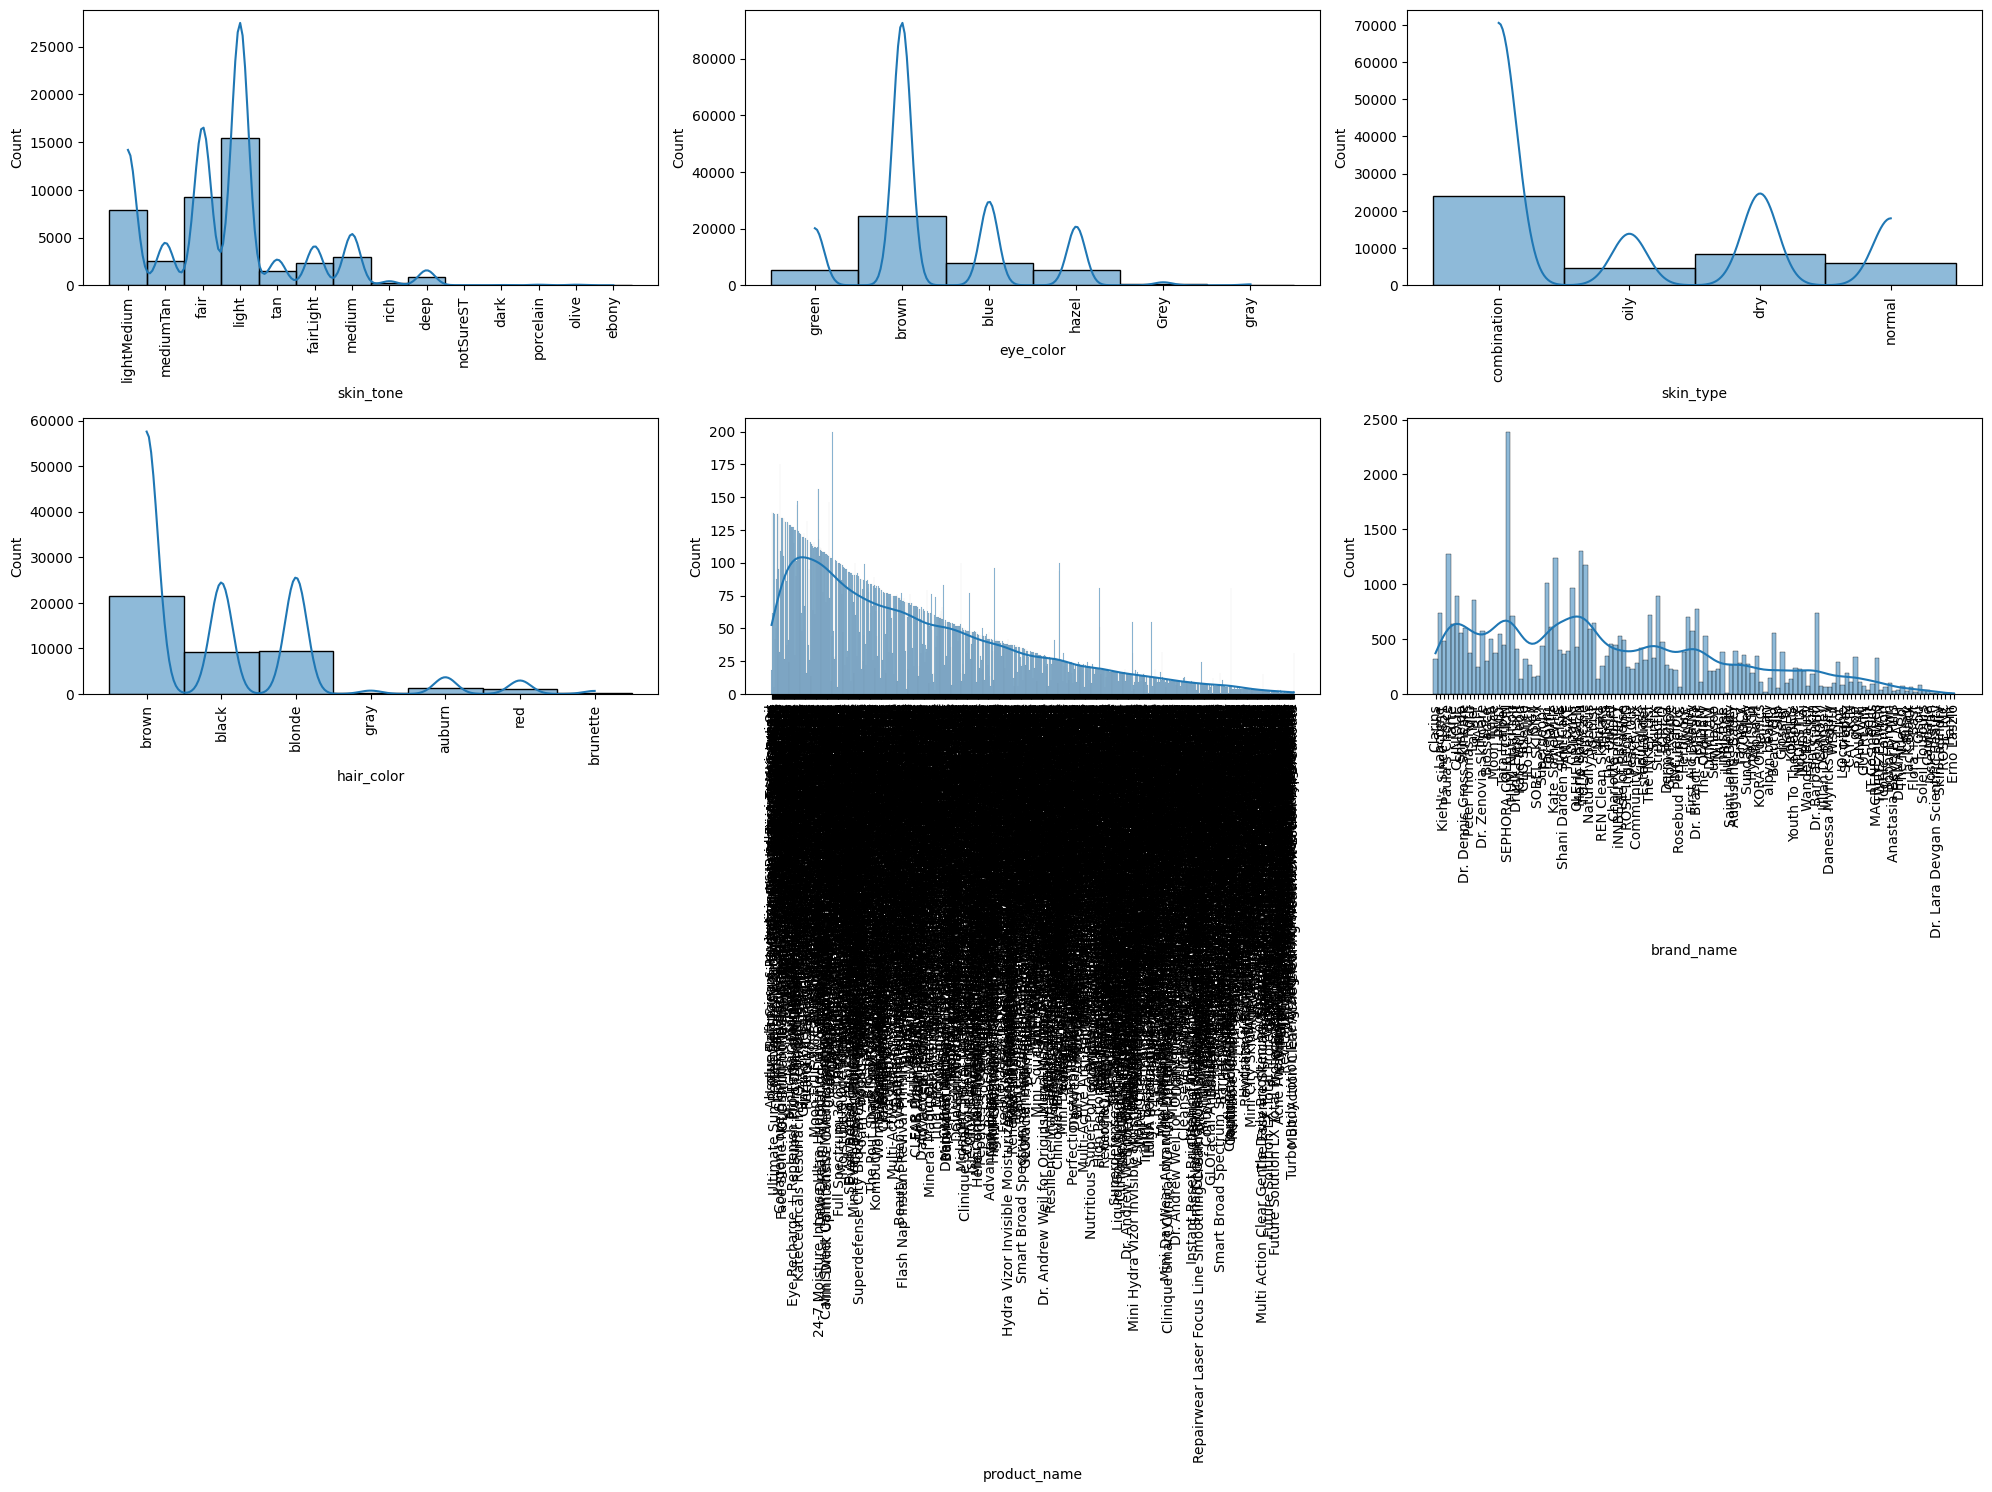

In [ ]:
plt.figure(figsize=(20, 15))
# Exclude columns that are not suitable for histogram plots
categorical_cols_to_plot = categorical_col.drop(columns=['author_id', 'submission_time', 'review_text', 'review_title','product_id'])
num_cols = len(categorical_cols_to_plot.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(categorical_cols_to_plot.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=categorical_cols_to_plot, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

## Data Numerical Summary

In [ ]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,24988.000000,4.212678,0.827581,0.560986,8.311163,1.936931,6.374232,66.884717
std,14427.261538,1.262289,0.377748,0.424391,21.285085,8.705750,16.778032,72.211730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,12494.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,28.000000
50%,24988.000000,5.000000,1.000000,0.714286,3.000000,0.000000,2.000000,45.000000
75%,37482.000000,5.000000,1.000000,1.000000,9.000000,2.000000,6.000000,74.000000
max,49976.000000,5.000000,1.000000,1.000000,1222.000000,1159.000000,776.000000,1900.000000


In [ ]:
df.nunique()

,0
Unnamed: 0,49977
author_id,41457
rating,5
is_recommended,2
helpfulness,1209
total_feedback_count,255
total_neg_feedback_count,124
total_pos_feedback_count,212
submission_time,3490
review_text,49395


# Data Visualization


## What
Apakah 5 produk  yang mengalami penjualan tertinggi berdasarkan 5 tahun terakhir?


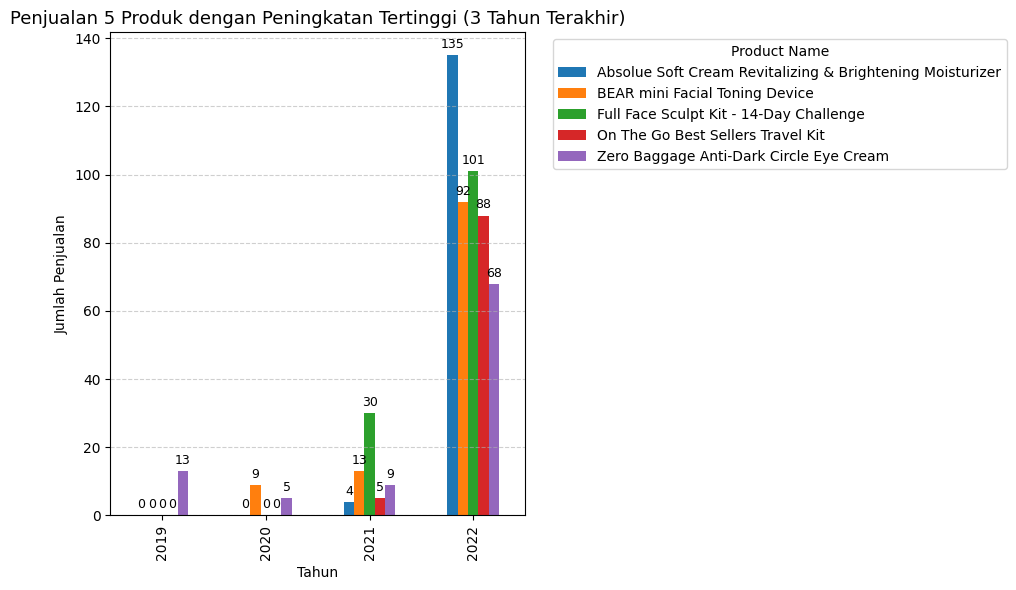

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan kolom waktu dalam format datetime
df['submission_time'] = pd.to_datetime(df['submission_time'])
df['year'] = df['submission_time'].dt.year

# Ambil data 5 tahun terakhir
last_5_years = sorted(df['year'].unique())[-5:]
df = df[df['year'].isin(last_5_years)]

# Hitung jumlah penjualan tiap produk per tahun
sales_per_year = df.groupby(['year', 'product_name']).size().reset_index(name='sales')

# Urutkan berdasarkan tahun
sales_per_year = sales_per_year.sort_values(['product_name', 'year'])

# Hitung tren peningkatan penjualan (selisih antara tahun pertama dan terakhir)
trend = sales_per_year.groupby('product_name')['sales'].apply(lambda x: x.iloc[-1] - x.iloc[0])
trend = trend.sort_values(ascending=False)

# Ambil 5 produk dengan peningkatan tertinggi
top5_products = trend.head(5).index

# Ambil data dari 5 produk tersebut
top5_data = sales_per_year[sales_per_year['product_name'].isin(top5_products)]

# Pivot agar tahun menjadi kolom (lebih mudah divisualisasikan)
pivot_data = top5_data.pivot(index='year', columns='product_name', values='sales')

# --- Visualisasi ---
ax = pivot_data.plot(kind='bar', figsize=(10,6))

plt.title('Penjualan 5 Produk dengan Peningkatan Tertinggi (3 Tahun Terakhir)', fontsize=13)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Tambahkan angka di atas batang ---
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.show()


Produk dengan penjualan tertinggi pada 5 tahun terakhir adalah Avocado Ceramide Moisture Barrier Cleanser,face cream,glow drops,mini face cream,dan mini glow drops.

Pada 3 tahun terakhir secara keseluruhan terjadi peningkatan penjualan produk.Pada tahun 2022 produk meningkat secara drastis yang didukung oleh pemulihan ekonomi pasca pandemi COVID 19,namun kembali sedikit menurun pada tahun 2023 yang mana dengan pemulihan ekonomi berarti semakin banyak kehadiran produk sehingga campaign yang kurang masif menjadi salah satu penyebab mengapa terjadi sedikit penurunan pada tahun 2023

Jadi,untuk dapat meningkatkan penjualan produk ditengah kondisi pemulihan ekonomi yang diiringi dengan banyaknya pilihan produk,diperlukan campaign yang masif dengan fokus untuk menaikkan impresi pada pelanggan menggunakan content di media sosial yang bersifat niche

## How
 Bagaimana korelasi antara harga produk dengan rating dan rekomendasi terhadap penjualan produk pada 3 tahun kebelakang?

In [ ]:
# Select only numerical columns for correlation calculation
df_numerical = df.select_dtypes(include=np.number)
df_numerical.corr()
# Calculate and display the correlation matrix
correlation_matrix = df_numerical.corr()
display(correlation_matrix)



,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd,year
Unnamed: 0,1.000000,-0.056025,-0.064034,0.133087,0.079119,0.043039,0.078241,-0.015688,0.075985
rating,-0.056025,1.000000,0.870625,-0.062512,-0.175108,-0.166672,-0.128325,0.023632,0.098934
is_recommended,-0.064034,0.870625,1.000000,-0.072026,-0.161781,-0.151286,-0.120254,0.020641,0.098963
helpfulness,0.133087,-0.062512,-0.072026,1.000000,0.189905,-0.027171,0.269714,-0.064268,-0.265648
total_feedback_count,0.079119,-0.175108,-0.161781,0.189905,1.000000,0.696890,0.892890,0.088913,-0.237900
total_neg_feedback_count,0.043039,-0.166672,-0.151286,-0.027171,0.696890,1.000000,0.299320,0.040359,-0.117123
total_pos_feedback_count,0.078241,-0.128325,-0.120254,0.269714,0.892890,0.299320,1.000000,0.092952,-0.242974
price_usd,-0.015688,0.023632,0.020641,-0.064268,0.088913,0.040359,0.092952,1.000000,0.040166
year,0.075985,0.098934,0.098963,-0.265648,-0.237900,-0.117123,-0.242974,0.040166,1.000000


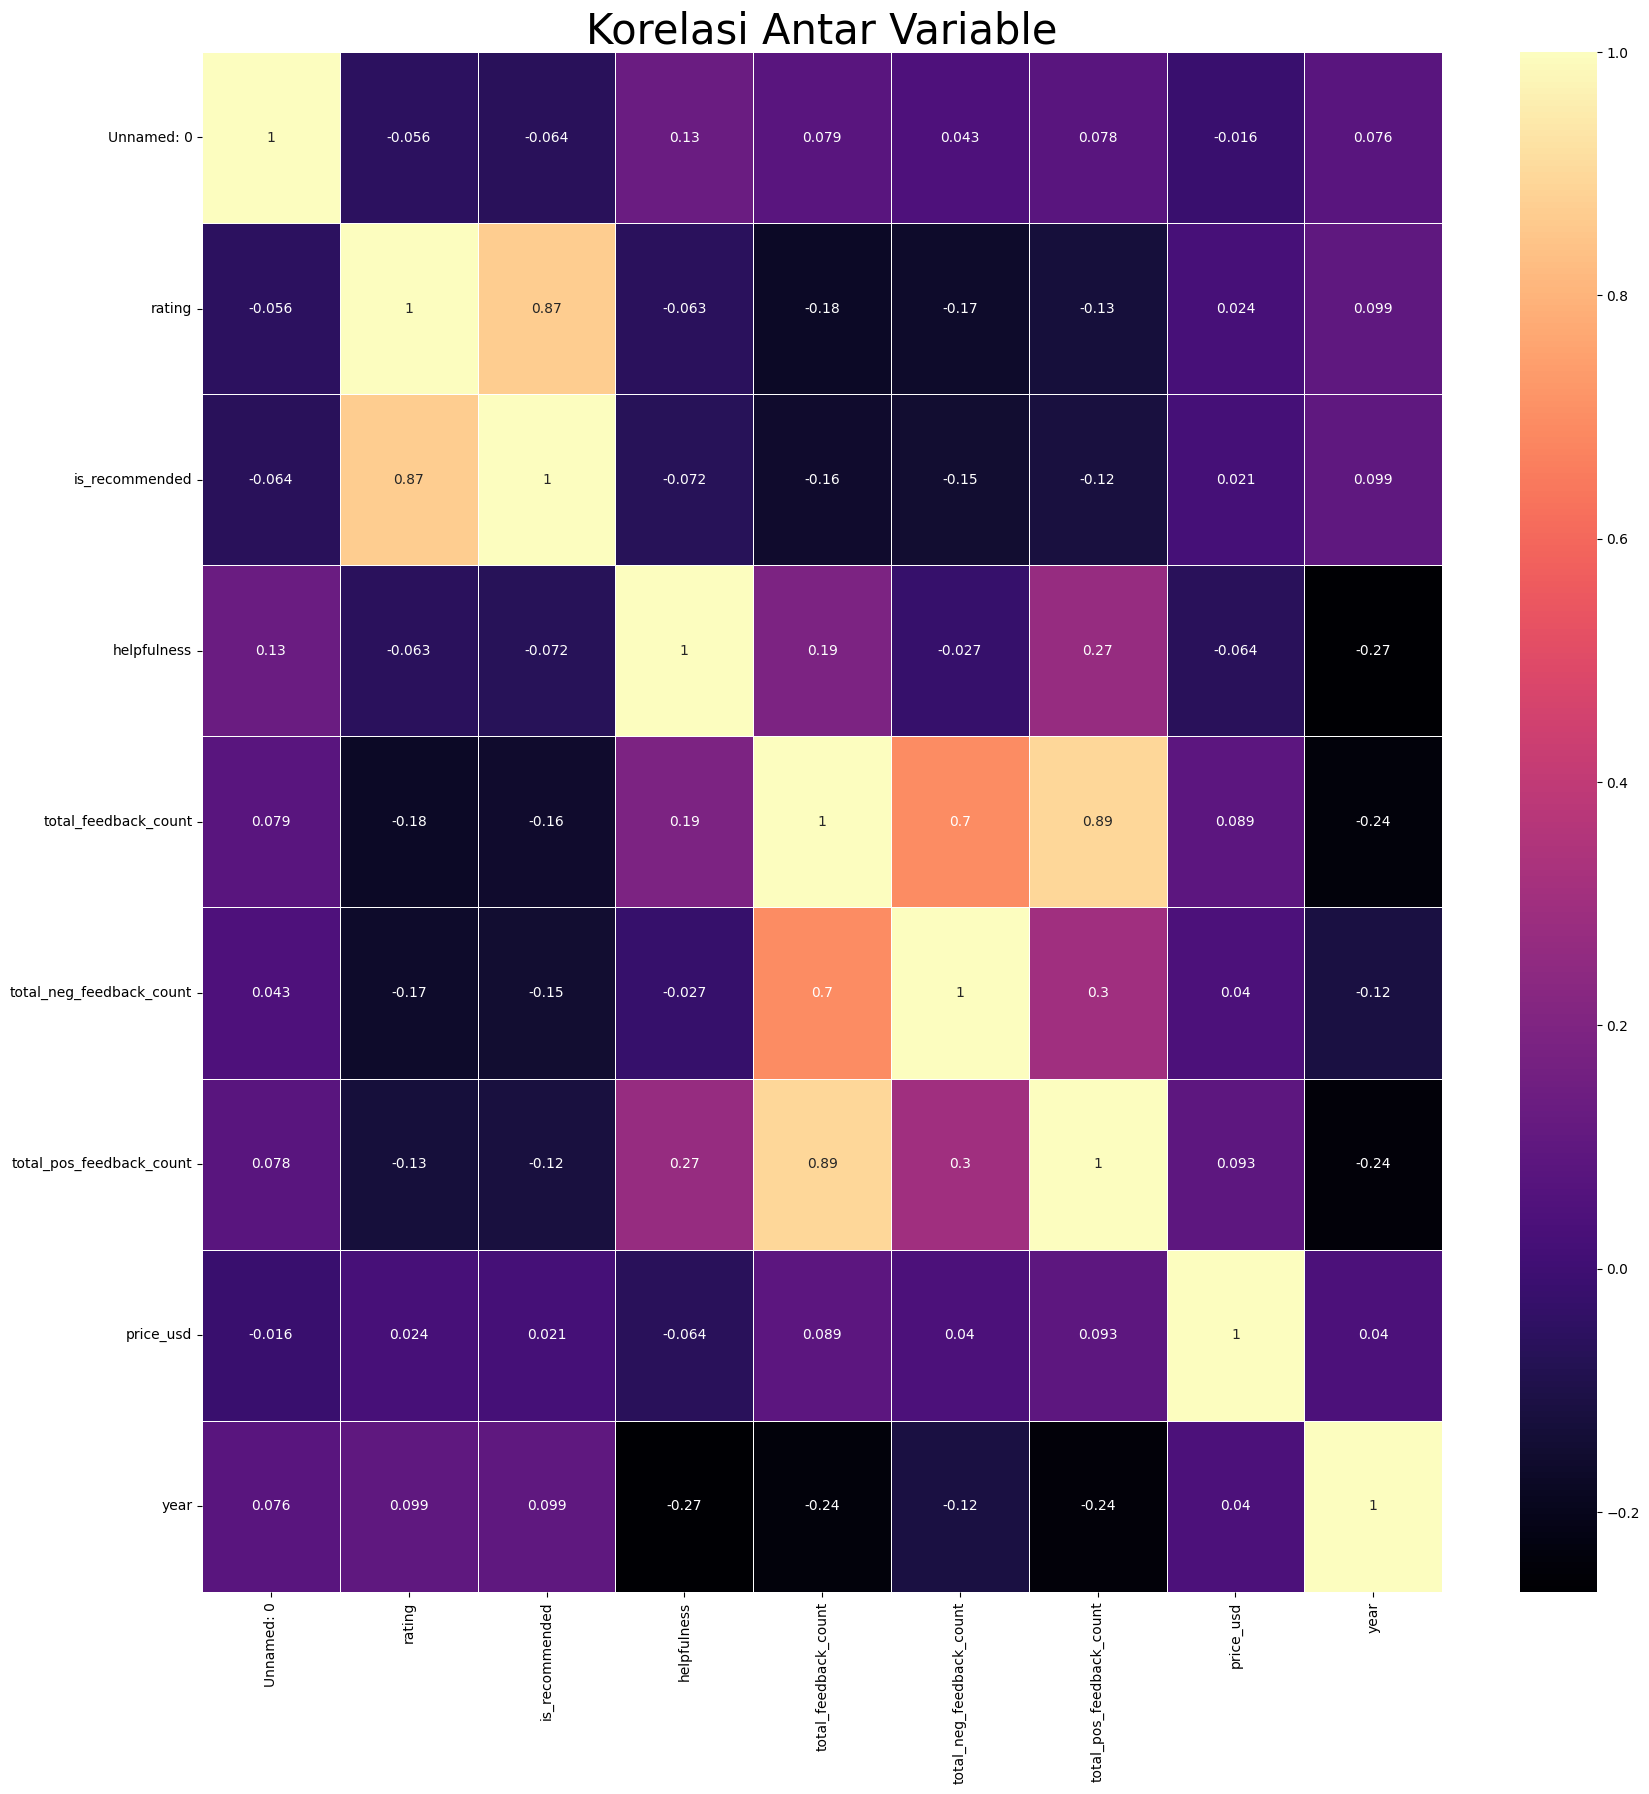

In [ ]:
# Heatmap Visualization
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True, linewidth=.5, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 30)
plt.show()

Pada tabel tersebut korelasi antara harga dengan rating dan rekomendasi bernilai positif pada kisaran 0.052,yang mana ini merupakan korelasi yang sangat lemah.

Korelasi yang sangat lemah ini menggambarkan bahwa harga yang mahal tidak memberikan persepsi bahwa produk memiliki kualitas baik dan hampir tidak berpengaruh sama sekali terhadap pelanggan dalam memberikan rating dan rekomendasi,sehingga terdapat faktor prioritas lain yang menjadi penentu bagi pelanggan

Jadi,karena persepsi harga tidak dapat membantu untuk dapat meningkatkan rating dan kepuasan pelanggan melalui rekomendasi,sehingga sebaiknya difokuskan kepada hal lain selain dengan menaikkan harga.